Importing a bunch of libraries

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

Importing our data

In [57]:
data = pd.read_excel('NBA_playing_around_1972to2019.xlsx',index_col=0)

Checking out our data

In [59]:
data.head(15)

,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Diff,Champions
0,Cleveland Cavaliers*,57,25,0.695,—,104.3,98.3,5.45,2016,6.0,1
1,Toronto Raptors*,56,26,0.683,1.0,102.7,98.2,4.08,2016,4.5,0
2,Miami Heat*,48,34,0.585,9.0,100.0,98.4,1.50,2016,1.6,0
3,Atlanta Hawks*,48,34,0.585,9.0,102.8,99.2,3.49,2016,3.6,0
4,Boston Celtics*,48,34,0.585,9.0,105.7,102.5,2.84,2016,3.2,0
5,Charlotte Hornets*,48,34,0.585,9.0,103.4,100.7,2.36,2016,2.7,0
6,Indiana Pacers*,45,37,0.549,12.0,102.2,100.5,1.62,2016,1.7,0
7,Detroit Pistons*,44,38,0.537,13.0,102.0,101.4,0.43,2016,0.6,0
8,Chicago Bulls,42,40,0.512,15.0,101.6,103.1,-1.46,2016,-1.5,0
9,Washington Wizards,41,41,0.500,16.0,104.1,104.6,-0.50,2016,-0.5,0


In [60]:
data.tail()

,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Diff,Champions
11,Portland Trail Blazers,41,41,0.500,15.0,90.7,92.0,-0.58,2004,-1.3,0
12,Golden State Warriors,37,45,0.451,19.0,93.3,94.0,-0.07,2004,-0.7,0
13,Seattle SuperSonics,37,45,0.451,19.0,97.1,97.8,0.02,2004,-0.7,0
14,Phoenix Suns,29,53,0.354,27.0,94.2,97.9,-2.94,2004,-3.7,0
15,Los Angeles Clippers,28,54,0.341,28.0,94.8,99.4,-3.74,2004,-4.6,0


Seems strange that our index ends at 15? Probably just need to redfine the index

In [61]:
data.index = range(0,data.shape[0])

In [62]:
data.tail()

,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Diff,Champions
1252,Portland Trail Blazers,41,41,0.500,15.0,90.7,92.0,-0.58,2004,-1.3,0
1253,Golden State Warriors,37,45,0.451,19.0,93.3,94.0,-0.07,2004,-0.7,0
1254,Seattle SuperSonics,37,45,0.451,19.0,97.1,97.8,0.02,2004,-0.7,0
1255,Phoenix Suns,29,53,0.354,27.0,94.2,97.9,-2.94,2004,-3.7,0
1256,Los Angeles Clippers,28,54,0.341,28.0,94.8,99.4,-3.74,2004,-4.6,0


Looks check out the describe now



In [63]:
data.describe()

,W,L,W/L%,PS/G,PA/G,SRS,Year,Diff,Champions
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000
mean,40.439141,40.439141,0.500004,102.552188,102.550915,-0.000334,1997.539379,0.001273,0.038186
std,12.589160,12.589729,0.151903,6.962926,7.002537,4.396049,13.376300,4.562597,0.191722
min,7.000000,9.000000,0.106000,81.900000,83.400000,-14.680000,1972.000000,-15.200000,0.000000
25%,31.000000,31.000000,0.380000,97.300000,97.400000,-3.030000,1987.000000,-3.100000,0.000000
50%,41.000000,40.000000,0.512000,102.400000,102.800000,0.160000,1998.000000,0.200000,0.000000
75%,50.000000,50.000000,0.610000,107.700000,107.500000,3.120000,2009.000000,3.300000,0.000000
max,73.000000,73.000000,0.890000,126.500000,130.800000,11.800000,2019.000000,12.300000,1.000000


strange that GB (games behind) doesn't show up. Oh look. In the head(), we see that some are labelled as '-'. We should fix that

In [64]:
data['GB'] = np.where(data['GB']!='—',data['GB'],np.nan)

In [65]:
data.head()

,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Diff,Champions
0,Cleveland Cavaliers*,57,25,0.695,NaN,104.3,98.3,5.45,2016,6.0,1
1,Toronto Raptors*,56,26,0.683,1.0,102.7,98.2,4.08,2016,4.5,0
2,Miami Heat*,48,34,0.585,9.0,100.0,98.4,1.50,2016,1.6,0
3,Atlanta Hawks*,48,34,0.585,9.0,102.8,99.2,3.49,2016,3.6,0
4,Boston Celtics*,48,34,0.585,9.0,105.7,102.5,2.84,2016,3.2,0


In [66]:
data['GB'] = data['GB'].astype('float64')

In [67]:
data.describe()

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Diff,Champions
count,1257.000000,1257.000000,1257.000000,1042.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000
mean,40.439141,40.439141,0.500004,19.131958,102.552188,102.550915,-0.000334,1997.539379,0.001273,0.038186
std,12.589160,12.589729,0.151903,11.762994,6.962926,7.002537,4.396049,13.376300,4.562597,0.191722
min,7.000000,9.000000,0.106000,1.000000,81.900000,83.400000,-14.680000,1972.000000,-15.200000,0.000000
25%,31.000000,31.000000,0.380000,10.000000,97.300000,97.400000,-3.030000,1987.000000,-3.100000,0.000000
50%,41.000000,40.000000,0.512000,17.000000,102.400000,102.800000,0.160000,1998.000000,0.200000,0.000000
75%,50.000000,50.000000,0.610000,27.000000,107.700000,107.500000,3.120000,2009.000000,3.300000,0.000000
max,73.000000,73.000000,0.890000,59.000000,126.500000,130.800000,11.800000,2019.000000,12.300000,1.000000


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Team       1257 non-null   object 
 1   W          1257 non-null   int64  
 2   L          1257 non-null   int64  
 3   W/L%       1257 non-null   float64
 4   GB         1042 non-null   float64
 5   PS/G       1257 non-null   float64
 6   PA/G       1257 non-null   float64
 7   SRS        1257 non-null   float64
 8   Year       1257 non-null   int64  
 9   Diff       1257 non-null   float64
 10  Champions  1257 non-null   int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 108.1+ KB


Much better

Now, let's check out the data with a pairplot!

<Figure size 2880x2880 with 0 Axes>

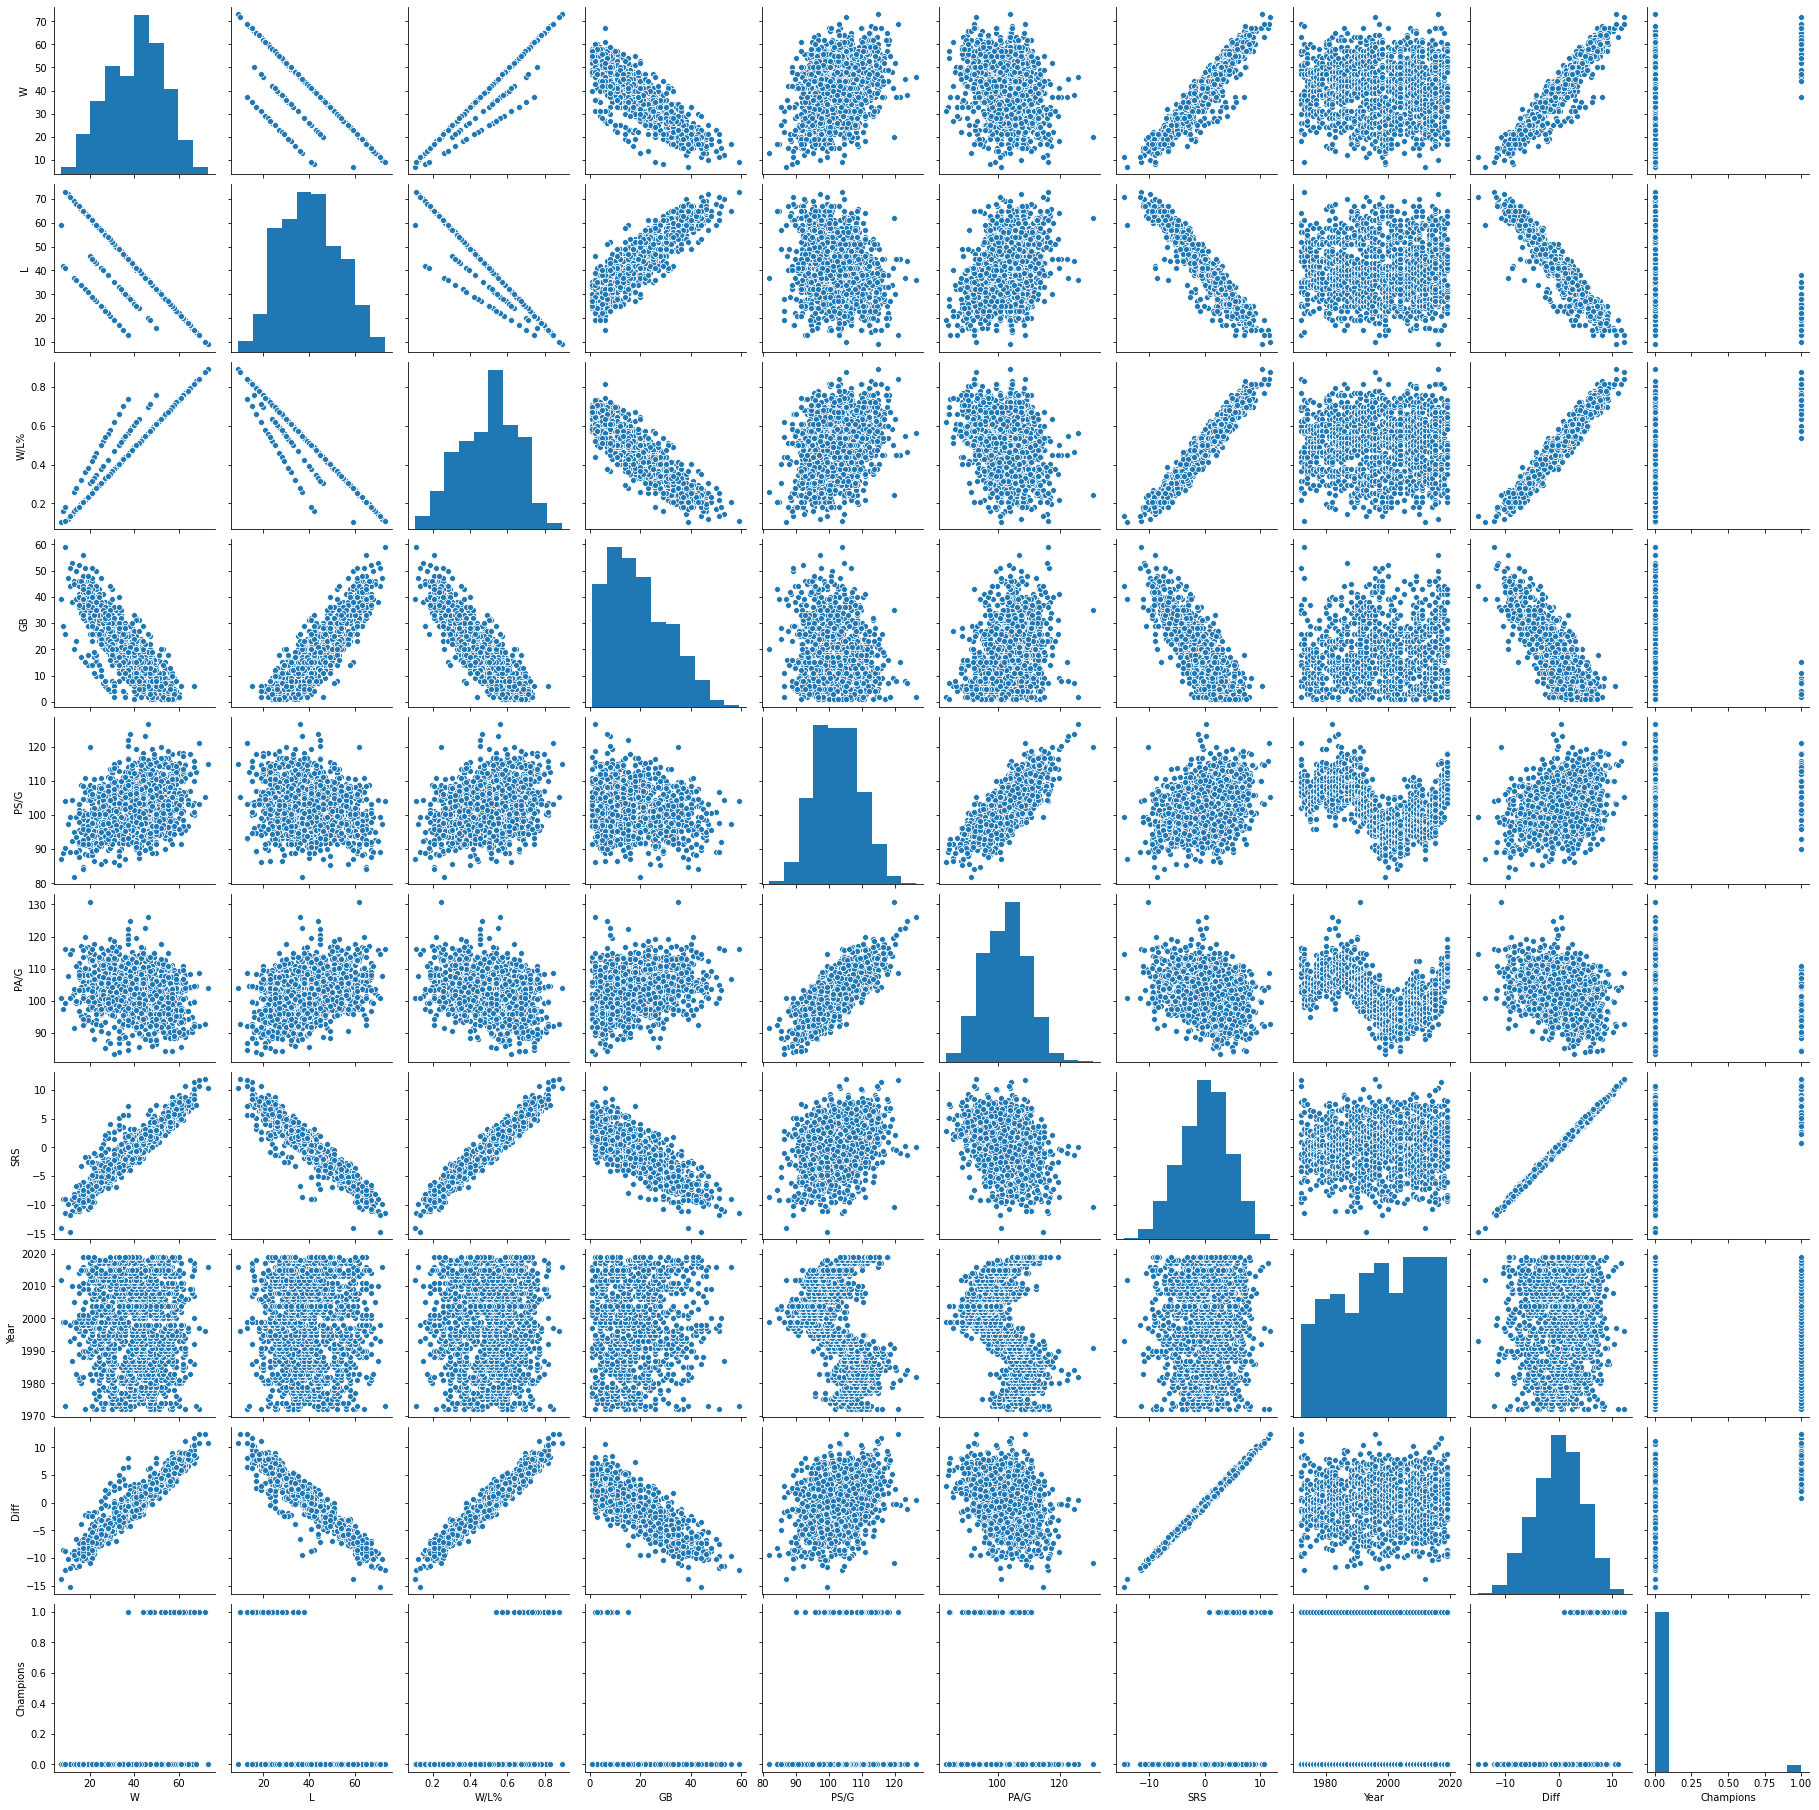

In [52]:
plt.figure(figsize=[40,40])
sns.pairplot(data)

Out of curiosity, I wanted to check out the Team names, in case that was something we could play around with. But not so much. Too many teams and too many instances where the team name is a bit weird

In [54]:
data['Team'].unique()

array(['Cleveland Cavaliers*', 'Toronto Raptors*', 'Miami Heat*',
       'Atlanta Hawks*', 'Boston Celtics*', 'Charlotte Hornets*',
       'Indiana Pacers*', 'Detroit Pistons*', 'Chicago Bulls',
       'Washington Wizards', 'Orlando Magic', 'Milwaukee Bucks',
       'New York Knicks', 'Brooklyn Nets', 'Philadelphia 76ers',
       'Golden State Warriors*', 'San Antonio Spurs*',
       'Oklahoma City Thunder*', 'Los Angeles Clippers*',
       'Portland Trail Blazers*', 'Dallas Mavericks*',
       'Memphis Grizzlies*', 'Houston Rockets*', 'Utah Jazz',
       'Sacramento Kings', 'Denver Nuggets', 'New Orleans Pelicans',
       'Minnesota Timberwolves', 'Phoenix Suns', 'Los Angeles Lakers',
       'Washington Wizards*', 'Milwaukee Bucks*', 'Chicago Bulls*',
       'Miami Heat', 'Detroit Pistons', 'Charlotte Hornets', 'Utah Jazz*',
       'Dallas Mavericks', 'Philadelphia 76ers*', 'Atlanta Hawks',
       'New Orleans Pelicans*', 'Minnesota Timberwolves*',
       'Los Angeles Clippers', 'Memp

So, what should we do? What data looks interesting to you guys?

People want to fit a curvy line to points scored per game (PS/G) and the year

In [143]:
X = data[['Year']]
y = data['PS/G'] 

It certainly looks like the points scored per game when up in the 80s, down in the 00s, and is now back on the rise

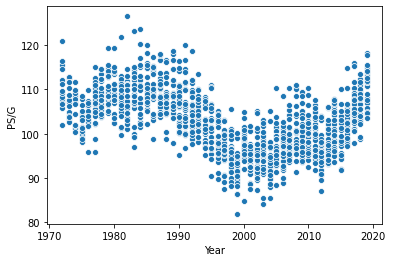

In [144]:
sns.scatterplot(X['Year'],y)

Is this linear or non-linear?

Can we predict PS/G using year?

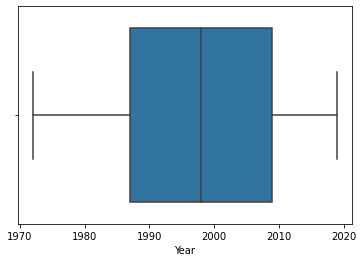

In [102]:
sns.boxplot(X['Year'])

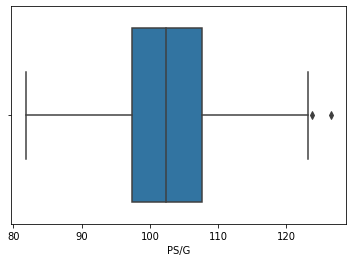

In [75]:
sns.boxplot(y)

In [77]:
data.duplicated().any() # probably should have check earlier = but you can trust Garrett's web scraping

False

any other feature engineering?

Oh yeah. Missing data. Info told us there weren't any, but let's check the heatmap anyways

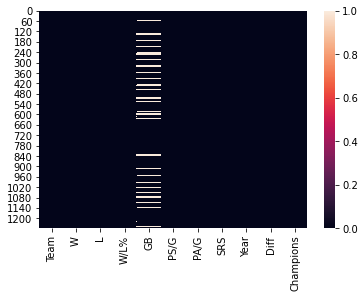

In [78]:
sns.heatmap(data.isnull())

check R^2 value for testing set between linear and different polynomial fits

In [145]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

Code taken from a previous lecture that we adapted

1
2
3
4
5


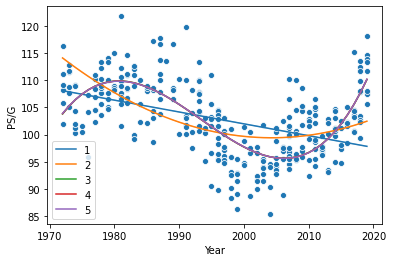

In [147]:
sns.scatterplot(X_test[X_test.columns[0]],y_test)

training_score = []
testing_score = []
polys = [1,2,3,4,5]
for degree in polys:
  
  print(degree)
  p = PolynomialFeatures(degree)
  X_p = p.fit_transform(X_train) 
  model = LinearRegression() 
  model.fit(X_p, y_train) 

  sns.lineplot(X_test[X_test.columns[0]],model.predict(p.fit_transform(X_test)),label = str(degree))

  training_score.append(model.score(X_p,y_train))
  testing_score.append(model.score(p.fit_transform(X_test),y_test))

plt.legend()

Interesting that the 3, 4, and 5th polynomials all overlap. But, so it goes I guess!

When you check the training adn testing scores, the data is best predicted when the polynomial is at least 3, which is what we see in the figure above

In [98]:
training_score

[0.1687373921962919,
 0.27825423328402665,
 0.5182355424745911,
 0.5181018980287725,
 0.5179559314033049]

In [99]:
testing_score

[0.13565822442140618,
 0.28085050291157077,
 0.47612138380479385,
 0.4760650316712217,
 0.4759943388239159]

Let's see points allowed per game (PA/G) 

Looks very similar to PS/G

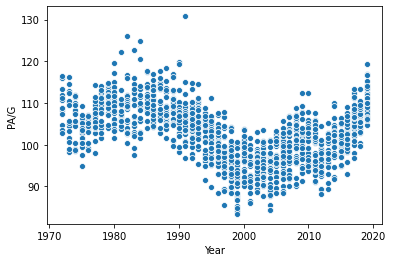

In [151]:
sns.scatterplot(data['Year'],data['PA/G'])

Based on this finding, we may have the following logic:

If PS/G is a wavy line
If PA/G is also a wavy line

and, these wavy lines basically overlap

We've expect that year and Diff (i.e., PS/G - PA/G) probably has no relationship

And that is what we do see! 

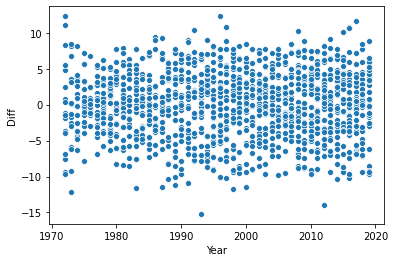

In [152]:
sns.scatterplot(data['Year'],data['Diff'])